In [1]:
import pandas as pd
import numpy as np

from sktime.datasets import load_airline
#from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

from sktime.utils.plotting import plot_series

In [2]:
# step 1: data specification
y = load_airline()


In [3]:
type(y)

pandas.core.series.Series

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

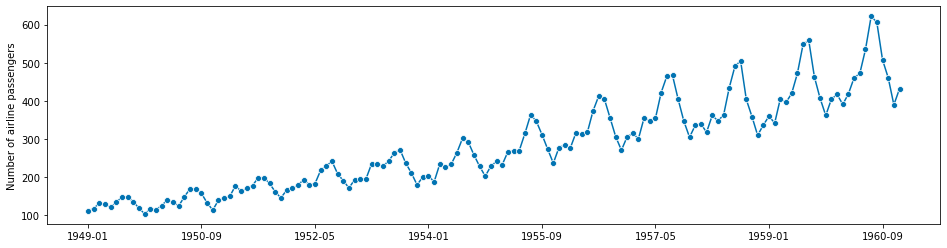

In [4]:
plot_series(y)

In [5]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

In [6]:
# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="mean", sp=12)

In [7]:
# step 4: fitting the forecaster
forecaster.fit(y)

NaiveForecaster(sp=12, strategy='mean')

In [8]:
# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

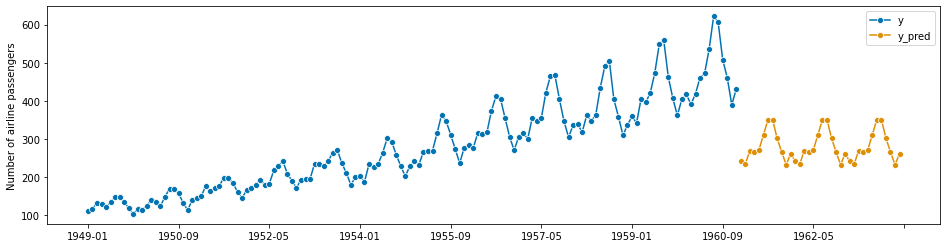

In [9]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [10]:
from sktime.forecasting.theta import ThetaForecaster
# step 3: specifying the forecasting algorithm
forecaster = ThetaForecaster(sp = 12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

In [11]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage            
                0.9            
              lower       upper
1961-01  418.280122  464.281951
1961-02  402.215882  456.888054
1961-03  459.966114  522.110499
1961-04  442.589311  511.399213
1961-05  443.525029  518.409479
1961-06  506.585817  587.087736
1961-07  561.496771  647.248955
1961-08  557.363325  648.062362
1961-09  477.658058  573.047750
1961-10  407.915093  507.775353
1961-11  346.942927  451.082014
1961-12  394.708224  502.957139
1962-01  399.628457  511.836772
1962-02  385.564800  501.597485
1962-03  447.164613  566.899579
1962-04  430.825484  554.151638
1962-05  433.140588  559.956275
1962-06  499.398266  629.610004
1962-07  557.085964  690.607403
1962-08  553.705639  690.456700
1962-09  472.237085  612.143236
1962-10  400.983991  543.975631
1962-11  338.726672  484.738614
1962-12  388.617658  537.588680
1963-01  394.247963  546.120421
1963-02  380.250569  534.970063
1963-03  444.268346  601.783423
1963-04  427.851908  588.113812
1963-05  430.648390  593.610828
1963-06  499.362023  664.980965
1963-07  559.203751  727.437257
1963-08  556.045469  726.853521
1963-09  472.355234  645.699598
1963-10  399.192350  575.036448
1963-11  335.298420  513.607211
1963-12  387.003717  567.743594

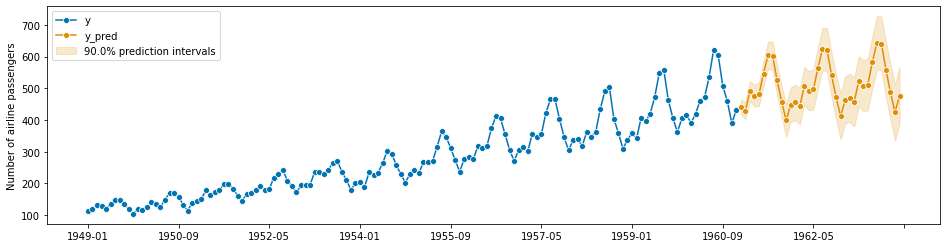

In [12]:
from sktime.utils import plotting

fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["Coverage"][coverage]["lower"],
    y_pred_ints["Coverage"][coverage]["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{coverage*100}% prediction intervals",
)
ax.legend();